
# Clase — Introducción a EDA en Python (Conceptos con *Palmer Penguins*)

**Dataset:** `penguins.csv` del proyecto *Palmer Penguins* (columnas comunes: `species`, `island`, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`, `sex`, `year`).

## 0) Preparación del entorno y carga de datos

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RAW_URL = "https://raw.githubusercontent.com/bdm-unlu/2025/main/TPs/TP00/data/penguins.csv"

df = pd.read_csv(RAW_URL)
print("Dimensiones:", df.shape)
df.head()


Dimensiones: (344, 9)


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
display(df.head())

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
# esquema de datos
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [ ]:
# ver columnas
df.columns

Index(['id', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


## Exploración de datos (EDA básica)


In [ ]:
# resumen completo
df.describe()

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [ ]:
# resumen completo
df.describe(include='object')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [ ]:

# Tipos y primeras filas
df.info()
display(df.head(10))

# Valores faltantes (NA)
na_counts = df.isna().sum().sort_values(ascending=False)
display(na_counts.to_frame("NA_count"))

# Resumen de numéricas y categóricas
desc_num = df.describe(include=[np.number]).T
desc_cat = df.describe(include=["object","category"]).T
display(desc_num)
display(desc_cat)

# Frecuencias básicas de variables categóricas clave
for c in ["species","island","sex","year"]:
    if c in df.columns:
        display(df[c].value_counts(dropna=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


,NA_count
sex,11
body_mass_g,2
bill_depth_mm,2
flipper_length_mm,2
bill_length_mm,2
id,0
island,0
species,0
year,0


,count,mean,std,min,25%,50%,75%,max
id,344.0,171.500000,99.448479,0.0,85.750,171.50,257.25,343.0
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.50,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.70,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.00,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.00,6300.0
year,344.0,2008.029070,0.818356,2007.0,2007.000,2008.00,2009.00,2009.0


,count,unique,top,freq
species,344,3,Adelie,152
island,344,3,Biscoe,168
sex,333,2,male,168


,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


,count
island,
Biscoe,168
Dream,124
Torgersen,52


,count
sex,
male,168
female,165
NaN,11


,count
year,
2009,120
2008,114
2007,110


In [ ]:
df[["species", "bill_length_mm"]]

,species,bill_length_mm
0,Adelie,39.1
1,Adelie,39.5
2,Adelie,40.3
3,Adelie,NaN
4,Adelie,36.7
...,...,...
339,Chinstrap,55.8
340,Chinstrap,43.5
341,Chinstrap,49.6
342,Chinstrap,50.8



## Medidas de posición


In [ ]:

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

means = df[num_cols].mean(numeric_only=True)
medians = df[num_cols].median(numeric_only=True)
modes = df[num_cols].mode(numeric_only=True)
modes = modes.iloc[0] if not modes.empty else pd.Series(index=num_cols, dtype=float)

posicion = pd.DataFrame({
    "mean": means,
    "median": medians,
    "mode": modes.reindex(index=means.index)
})
display(posicion)

# Medias por sexo y especie vs. media global
overall_mean = means.copy()

if "sex" in df.columns:
    mean_by_sex = df.groupby("sex")[num_cols].mean(numeric_only=True)
    display(mean_by_sex)
    display(mean_by_sex - overall_mean)

if "species" in df.columns:
    mean_by_species = df.groupby("species")[num_cols].mean(numeric_only=True)
    display(mean_by_species)
    display(mean_by_species - overall_mean)


,mean,median,mode
id,171.500000,171.50,0.0
bill_length_mm,43.921930,44.45,41.1
bill_depth_mm,17.151170,17.30,17.0
flipper_length_mm,200.915205,197.00,190.0
body_mass_g,4201.754386,4050.00,3800.0
year,2008.029070,2008.00,2009.0


,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
sex,,,,,,
female,172.436364,42.096970,16.425455,197.363636,3862.272727,2008.042424
male,174.196429,45.854762,17.891071,204.505952,4545.684524,2008.041667


,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
sex,,,,,,
female,0.936364,-1.824960,-0.725715,-3.551568,-339.481659,0.013354
male,2.696429,1.932832,0.739902,3.590748,343.930138,0.012597


,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
species,,,,,,
Adelie,75.5,38.791391,18.346358,189.953642,3700.662252,2008.013158
Chinstrap,309.5,48.833824,18.420588,195.823529,3733.088235,2007.970588
Gentoo,213.5,47.504878,14.982114,217.186992,5076.016260,2008.080645


,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
species,,,,,,
Adelie,-96.0,-5.130539,1.195188,-10.961562,-501.092134,-0.015912
Chinstrap,138.0,4.911894,1.269419,-5.091675,-468.666151,-0.058482
Gentoo,42.0,3.582948,-2.169056,16.271787,874.261874,0.051575



## Medidas de dispersión

In [ ]:

stds = df[num_cols].std(numeric_only=True)
vars_ = df[num_cols].var(numeric_only=True)
iqr = df[num_cols].quantile(0.75) - df[num_cols].quantile(0.25)

dispersion = pd.DataFrame({"std": stds, "var": vars_, "IQR": iqr})
display(dispersion)


,std,var,IQR
id,99.448479,9890.000000,171.500
bill_length_mm,5.459584,29.807054,9.275
bill_depth_mm,1.974793,3.899808,3.100
flipper_length_mm,14.061714,197.731792,23.000
body_mass_g,801.954536,643131.077327,1200.000
year,0.818356,0.669706,2.000


## Agrupamiento

In [ ]:
# ¿Qué especies hay?
print(df.groupby("species").groups.keys())

# ¿Qué datos tiene una determinada especie?
especies = df.groupby("species")
display(especies.get_group("Chinstrap"))

# ¿Cómo es la longitud media de las aleta (flipper_length_mm) según la especie?
print(especies["flipper_length_mm"].mean())

dict_keys(['Adelie', 'Chinstrap', 'Gentoo'])


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
276,276,Chinstrap,Dream,46.5,17.9,192.0,3500.0,female,2007
277,277,Chinstrap,Dream,50.0,19.5,196.0,3900.0,male,2007
278,278,Chinstrap,Dream,51.3,19.2,193.0,3650.0,male,2007
279,279,Chinstrap,Dream,45.4,18.7,188.0,3525.0,female,2007
280,280,Chinstrap,Dream,52.7,19.8,197.0,3725.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64


In [ ]:
df[["species", "sex", "flipper_length_mm"]].groupby(["species", "sex"],as_index=False).mean()

,species,sex,flipper_length_mm
0,Adelie,female,187.794521
1,Adelie,male,192.410959
2,Chinstrap,female,191.735294
3,Chinstrap,male,199.911765
4,Gentoo,female,212.706897
5,Gentoo,male,221.540984


## Gráficos

<Axes: >

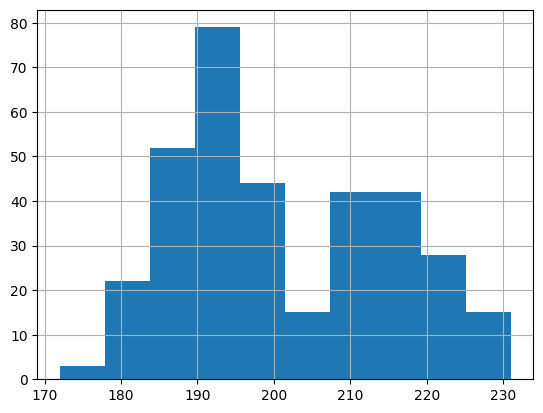

In [ ]:
# histograma
df['flipper_length_mm'].hist()

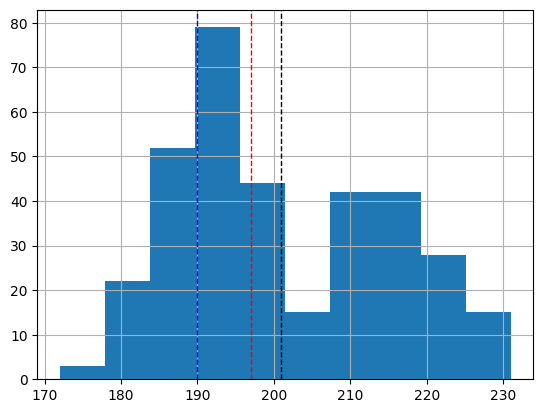

In [ ]:
# Visualización de las medidas de tendencia central en relación a la distribución de frecuencias
df["flipper_length_mm"].hist()
plt.axvline(df["flipper_length_mm"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df["flipper_length_mm"].median(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df["flipper_length_mm"].mode()[0], color='b', linestyle='dashed', linewidth=1)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

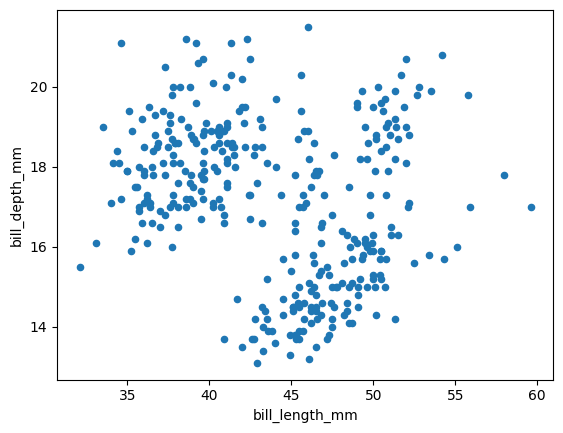

In [ ]:
# Gráfico de dispersión
df.plot.scatter(x="bill_length_mm", y="bill_depth_mm")

{'Adelie': 'red', 'Chinstrap': 'green', 'Gentoo': 'blue'}


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

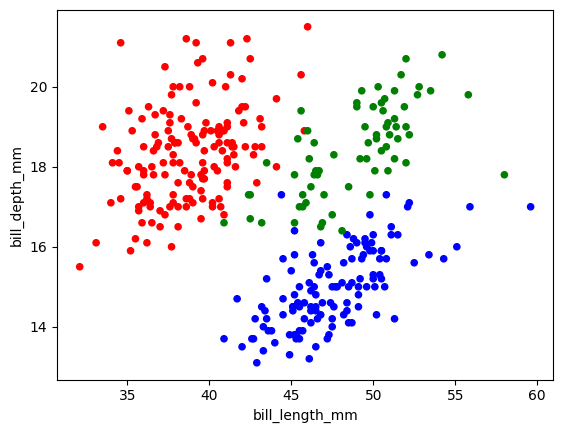

In [ ]:
# Definimos un diccionario de colores
colores = dict(zip(list(df.groupby("species").groups.keys()),["red","green","blue"]))
print(colores)
# Coloreamos por especie
lista_colores = [colores[categoria] for categoria in df["species"]]
df.plot.scatter(x="bill_length_mm", y="bill_depth_mm", c=lista_colores)


<Axes: xlabel='species'>

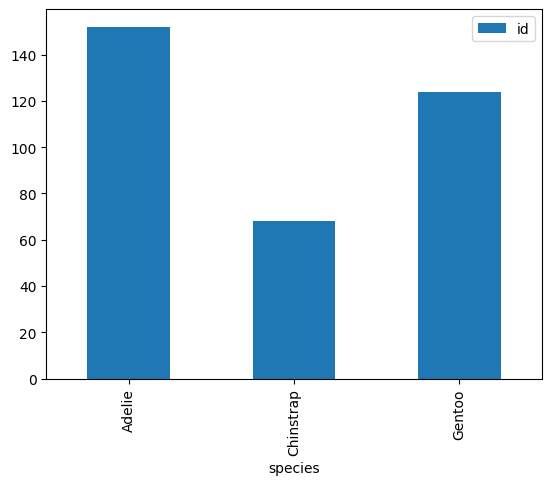

In [ ]:
# Gráficos de barras: Cantidad de casos por especie
df[["species", "id"]].groupby('species').count().plot.bar(y="id")

<Axes: xlabel='species'>

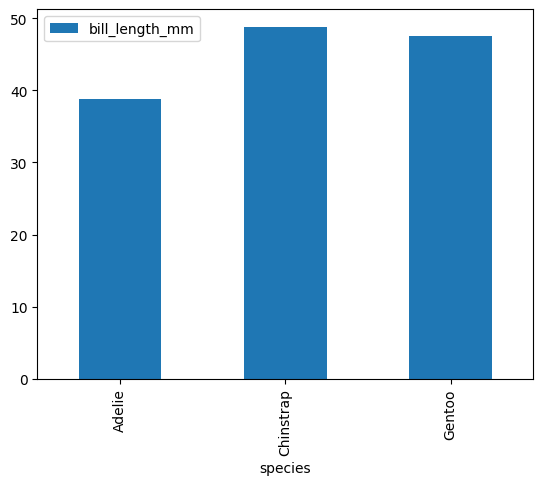

In [ ]:
# Gráficos de barras: Media del largo del pico por especie
df[["species", "bill_length_mm"]].groupby('species').mean().plot.bar(y="bill_length_mm")

<Axes: ylabel='proportion'>

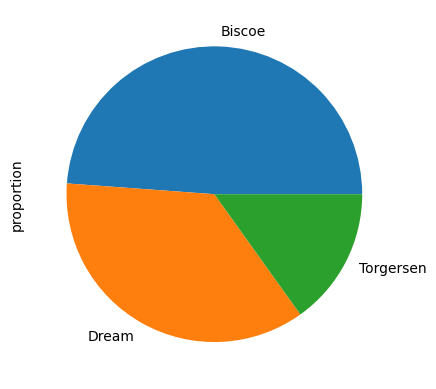

In [ ]:
# Gráfico de Torta (pie)
df.island.value_counts(normalize=True).plot.pie()

<Axes: title={'center': 'bill_length_mm'}, xlabel='[species]'>

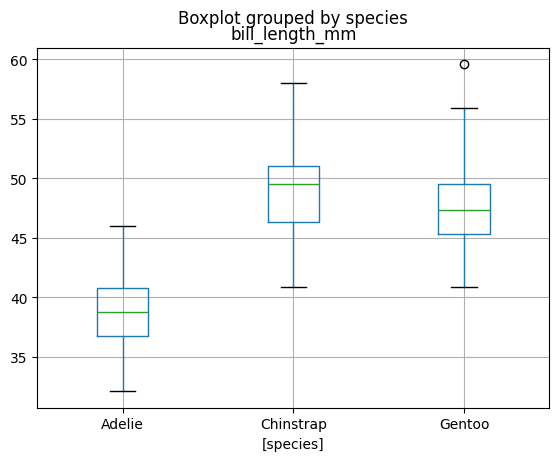

In [ ]:
# Boxplots por especies
df[["species", "bill_length_mm"]].boxplot(by="species")

Par seleccionado: bill_length_mm vs bill_depth_mm


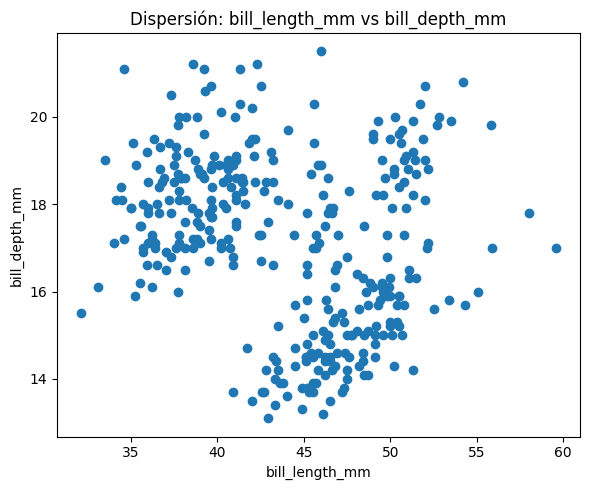

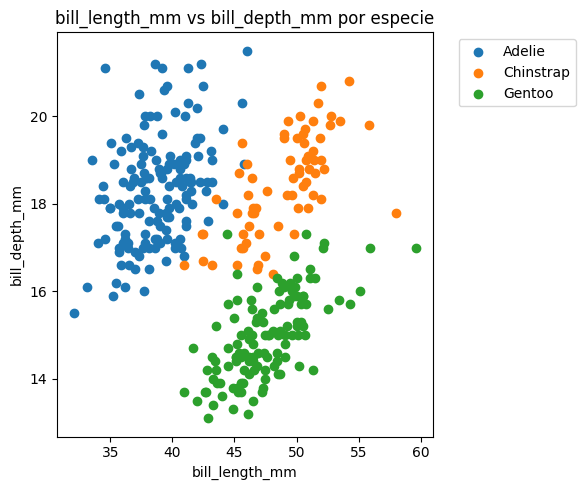

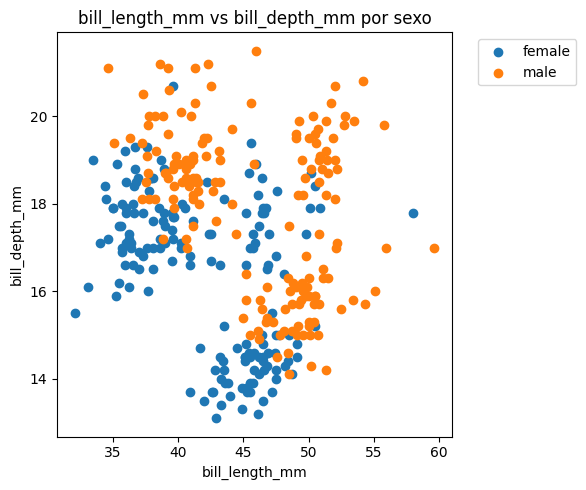

In [ ]:

x, y = None, None
if "bill_length_mm" in df.columns and "bill_depth_mm" in df.columns:
    x, y = "bill_length_mm", "bill_depth_mm"
elif len(num_cols) >= 2:
    x, y = num_cols[0], num_cols[1]

print("Par seleccionado:", x, "vs", y)

if x and y:
    plt.figure(figsize=(6,5))
    plt.scatter(df[x], df[y])
    plt.xlabel(x); plt.ylabel(y)
    plt.title(f"Dispersión: {x} vs {y}")
    plt.tight_layout()
    plt.show()

    if "species" in df.columns:
        plt.figure(figsize=(6,5))
        for sp, dfg in df.dropna(subset=[x,y,"species"]).groupby("species"):
            plt.scatter(dfg[x], dfg[y], label=str(sp))
        plt.xlabel(x); plt.ylabel(y)
        plt.title(f"{x} vs {y} por especie")
        plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
        plt.tight_layout()
        plt.show()

    if "sex" in df.columns:
        plt.figure(figsize=(6,5))
        for sx, dfg in df.dropna(subset=[x,y,"sex"]).groupby("sex"):
            plt.scatter(dfg[x], dfg[y], label=str(sx))
        plt.xlabel(x); plt.ylabel(y)
        plt.title(f"{x} vs {y} por sexo")
        plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
        plt.tight_layout()
        plt.show()


/tmp/ipython-input-3735008514.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(series, labels=labels, showmeans=True)


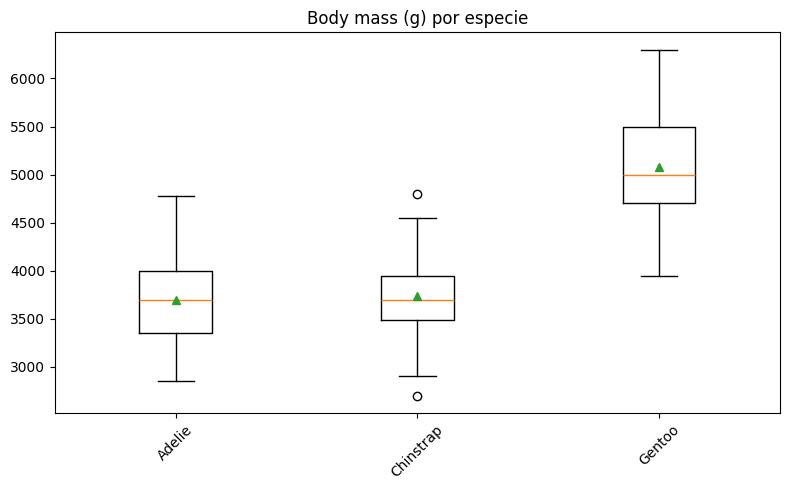

/tmp/ipython-input-3735008514.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(series, labels=labels, showmeans=True)


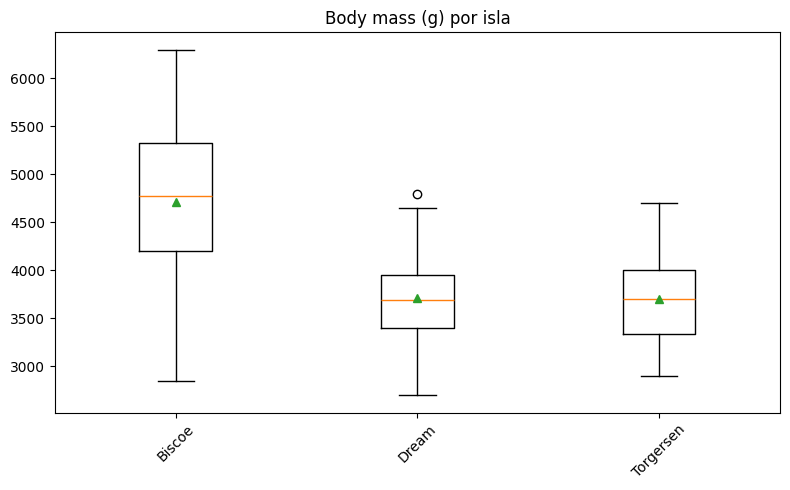

In [ ]:

if "body_mass_g" in df.columns:
    # Por especie
    if "species" in df.columns:
        groups = [g for _, g in df.dropna(subset=["body_mass_g","species"])[["body_mass_g","species"]].groupby("species")]
        labels = [str(v["species"].iloc[0]) for v in groups]
        series = [v["body_mass_g"].values for v in groups if len(v)>0]
        if series:
            plt.figure(figsize=(8,5))
            plt.boxplot(series, labels=labels, showmeans=True)
            plt.title("Body mass (g) por especie")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    # Por isla
    if "island" in df.columns:
        groups = [g for _, g in df.dropna(subset=["body_mass_g","island"])[["body_mass_g","island"]].groupby("island")]
        labels = [str(v["island"].iloc[0]) for v in groups]
        series = [v["body_mass_g"].values for v in groups if len(v)>0]
        if series:
            plt.figure(figsize=(8,5))
            plt.boxplot(series, labels=labels, showmeans=True)
            plt.title("Body mass (g) por isla")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


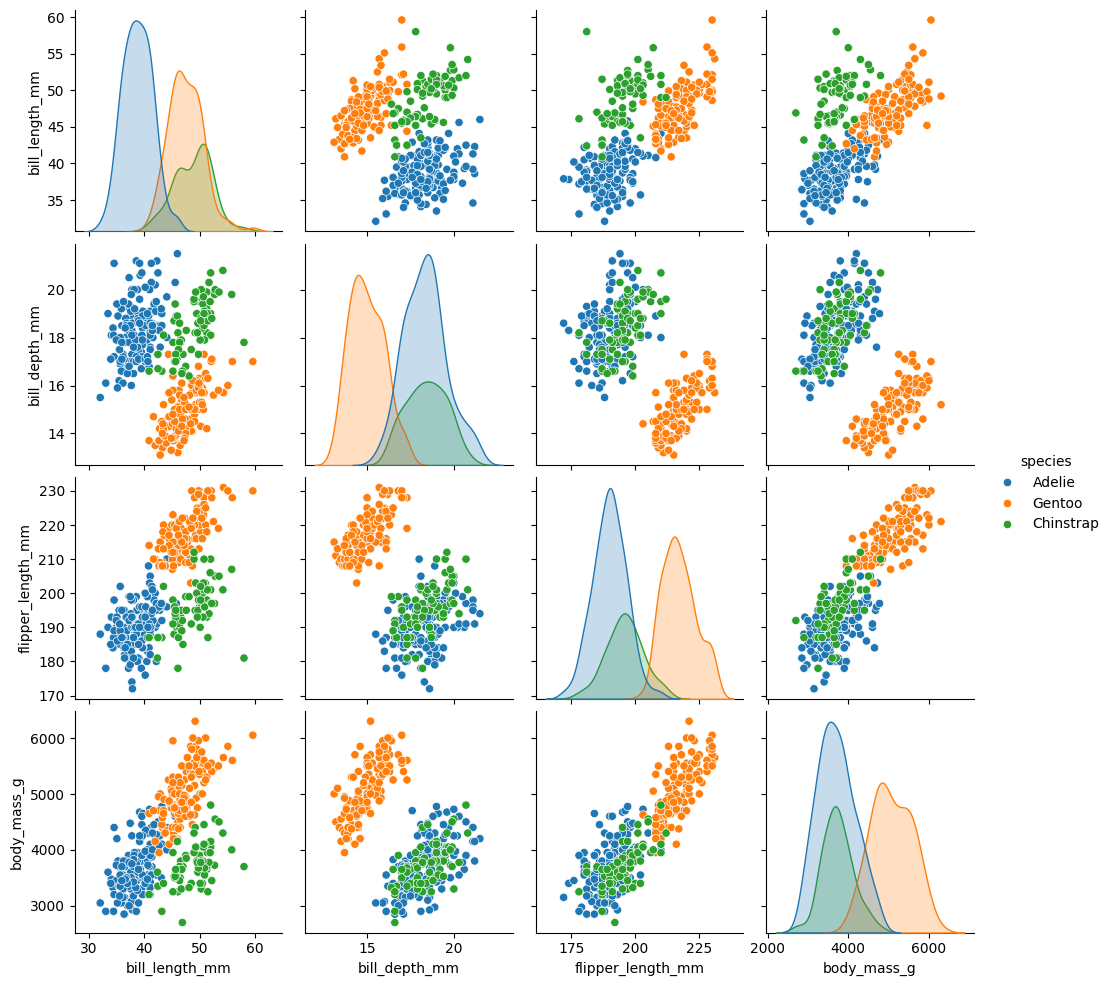

In [ ]:
import seaborn as sns

sns.pairplot(data = df, vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], hue="species" )
plt.show()


## Medidas de asociación — Correlación

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
id,1.000000,0.766039,-0.259563,0.455372,0.275493,0.339103
bill_length_mm,0.766039,1.000000,-0.235053,0.656181,0.595110,0.054545
bill_depth_mm,-0.259563,-0.235053,1.000000,-0.583851,-0.471916,-0.060354
flipper_length_mm,0.455372,0.656181,-0.583851,1.000000,0.871202,0.169675
body_mass_g,0.275493,0.595110,-0.471916,0.871202,1.000000,0.042209
year,0.339103,0.054545,-0.060354,0.169675,0.042209,1.000000


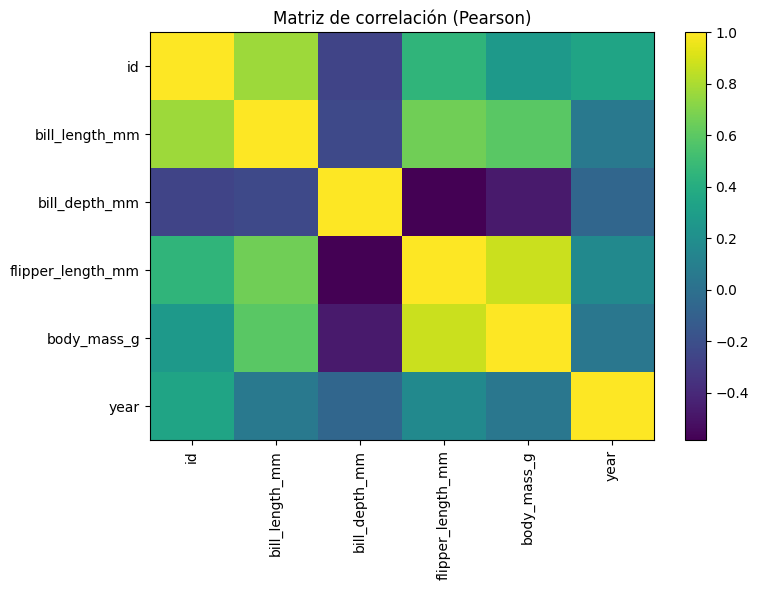

In [ ]:

corr = df.select_dtypes(include=[np.number]).corr()
display(corr)

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr.columns)), labels=corr.columns)
plt.title("Matriz de correlación (Pearson)")
plt.tight_layout()
plt.show()
